In [5]:
pip install pandas numpy matplotlib folium plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

In [7]:
import os

In [8]:
gtfs_path = "/Users/kathypresto/Desktop/gtfs"

In [9]:
files = ["agency.txt", "stops.txt", "routes.txt", "trips.txt", "stop_times.txt", "calendar.txt"]

In [10]:
gtfs_data = {file: pd.read_csv(os.path.join(gtfs_path, file)) for file in files}

In [11]:
for file, df in gtfs_data.items():
    print(f"--- {file} ---")
    print(df.head())
    print("\n")

--- agency.txt ---
  agency_id           agency_name                      agency_url  \
0    TRIMET                TriMet             https://trimet.org/   
1       PSC    Portland Streetcar  https://portlandstreetcar.org/   
2      TRAM  Portland Aerial Tram        http://www.gobytram.com/   

       agency_timezone agency_lang  agency_phone  \
0  America/Los_Angeles          en  503-238-RIDE   
1  America/Los_Angeles          en  503-222-4200   
2  America/Los_Angeles          en  503-494-8283   

                                     agency_fare_url  \
0                          https://trimet.org/fares/   
1  https://portlandstreetcar.org/fare-info/fare-info   
2                       http://www.gobytram.com/fare   

                 agency_email           bikes_policy_url  
0  customerservice@trimet.org  https://trimet.org/bikes/  
1  info@portlandstreetcar.org                        NaN  
2            commute@ohsu.edu                        NaN  


--- stops.txt ---
  stop_id  sto

In [12]:
stop_times = gtfs_data["stop_times.txt"]
print (stop_times.head())

    trip_id arrival_time departure_time  stop_id  stop_sequence stop_headsign  \
0  14218804     05:13:00       05:13:00     1026              1   M L King Jr   
1  14218804     05:13:59       05:13:59    13748              2   M L King Jr   
2  14218804     05:17:43       05:17:43    12918              3   M L King Jr   
3  14218804     05:19:06       05:19:06    14586              4   M L King Jr   
4  14218804     05:19:33       05:19:33    14587              5   M L King Jr   

   pickup_type  drop_off_type  shape_dist_traveled  timepoint  
0            0              1                  0.0          1  
1            0              0               2169.7          0  
2            0              0              10473.1          0  
3            0              0              13521.8          0  
4            0              0              14534.1          0  


In [13]:
stop_times['arrival_time'] = pd.to_datetime(stop_times['arrival_time'], format='%H:%M:%S', errors='coerce')
stop_times['departure_time'] = pd.to_datetime(stop_times['departure_time'], format='%H:%M:%S', errors='coerce')

In [14]:
routes = gtfs_data["routes.txt"]
trips = gtfs_data["trips.txt"]

print(routes.head())
print(trips.head())

  route_id agency_id route_short_name             route_long_name  route_type  \
0        1    TRIMET                1                     Vermont           3   
1        2    TRIMET              FX2                    Division           3   
2        4    TRIMET                4                   Fessenden           3   
3        6    TRIMET                6  Martin Luther King Jr Blvd           3   
4        8    TRIMET                8        Jackson Park/NE 15th           3   

                               route_url route_color route_text_color  \
0  https://trimet.org/schedules/r001.htm      084C8D           FFFFFF   
1  https://trimet.org/schedules/r002.htm      61A744           FFFFFF   
2  https://trimet.org/schedules/r004.htm      084C8D           FFFFFF   
3  https://trimet.org/schedules/r006.htm      084C8D           FFFFFF   
4  https://trimet.org/schedules/r008.htm      084C8D           FFFFFF   

   route_sort_order network_id  
0               400     TRIMET  
1       

In [15]:
# Load stops.txt
stops = gtfs_data["stops.txt"]

# Display the first few rows
print(stops.head())


  stop_id  stop_code          stop_name              tts_stop_name  \
0       2        2.0   A Ave & Chandler       ae avenue & chandler   
1       3        3.0  A Ave & Second St  ae avenue & second street   
2       4        4.0    A Ave & 10th St    ae avenue & 10th street   
3       6        6.0     A Ave & 8th St     ae avenue & 8th street   
4       7        7.0     A Ave & 8th St     ae avenue & 8th street   

                                   stop_desc   stop_lat    stop_lon zone_id  \
0  Eastbound stop in Lake Oswego (Stop ID 2)  45.420609 -122.675671       B   
1  Eastbound stop in Lake Oswego (Stop ID 3)  45.419388 -122.665197       B   
2  Westbound stop in Lake Oswego (Stop ID 4)  45.420703 -122.675152       B   
3  Eastbound stop in Lake Oswego (Stop ID 6)  45.420217 -122.673070       B   
4  Westbound stop in Lake Oswego (Stop ID 7)  45.420411 -122.672680       B   

                         stop_url  location_type parent_station  \
0  https://trimet.org/home/stop/2    

In [16]:
print(stop_times.columns)
print(stops.columns)


Index(['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence',
       'stop_headsign', 'pickup_type', 'drop_off_type', 'shape_dist_traveled',
       'timepoint'],
      dtype='object')
Index(['stop_id', 'stop_code', 'stop_name', 'tts_stop_name', 'stop_desc',
       'stop_lat', 'stop_lon', 'zone_id', 'stop_url', 'location_type',
       'parent_station', 'wheelchair_boarding', 'platform_code', 'direction',
       'position'],
      dtype='object')


In [17]:
# Convert stop_id in both DataFrames to string
stop_times['stop_id'] = stop_times['stop_id'].astype(str)
stops['stop_id'] = stops['stop_id'].astype(str)

# Merge stop_times with trips on trip_id
stop_times_trips = stop_times.merge(trips, on="trip_id", how="inner")

# Merge with stops on stop_id
otp_data = stop_times_trips.merge(stops, on="stop_id", how="inner")

# Display the merged DataFrame
print(otp_data.head())


    trip_id        arrival_time      departure_time stop_id  stop_sequence  \
0  14218804 1900-01-01 05:13:00 1900-01-01 05:13:00    1026              1   
1  14218804 1900-01-01 05:13:59 1900-01-01 05:13:59   13748              2   
2  14218804 1900-01-01 05:17:43 1900-01-01 05:17:43   12918              3   
3  14218804 1900-01-01 05:19:06 1900-01-01 05:19:06   14586              4   
4  14218804 1900-01-01 05:19:33 1900-01-01 05:19:33   14587              5   

  stop_headsign  pickup_type  drop_off_type  shape_dist_traveled  timepoint  \
0   M L King Jr            0              1                  0.0          1   
1   M L King Jr            0              0               2169.7          0   
2   M L King Jr            0              0              10473.1          0   
3   M L King Jr            0              0              13521.8          0   
4   M L King Jr            0              0              14534.1          0   

   ...   stop_lat    stop_lon  zone_id                  

In [18]:
import numpy as np

In [22]:
# simulate actual arrial times with delay (in seconds)
otp_data['actual_arrival_time'] = otp_data['arrival_time'] + pd.to_timedelta(np.random.randint(-60, 300, size=len(otp_data)), unit='s')

# calculate delay
otp_data['delay_seconds'] = (otp_data['actual_arrival_time'] - otp_data['arrival_time']).dt.total_seconds()

# categorize as 'on-time' or 'late'
otp_data['on_time'] = otp_data['delay_seconds'].between(-60, 300)
print(otp_data.head())

    trip_id        arrival_time      departure_time stop_id  stop_sequence  \
0  14218804 1900-01-01 05:13:00 1900-01-01 05:13:00    1026              1   
1  14218804 1900-01-01 05:13:59 1900-01-01 05:13:59   13748              2   
2  14218804 1900-01-01 05:17:43 1900-01-01 05:17:43   12918              3   
3  14218804 1900-01-01 05:19:06 1900-01-01 05:19:06   14586              4   
4  14218804 1900-01-01 05:19:33 1900-01-01 05:19:33   14587              5   

  stop_headsign  pickup_type  drop_off_type  shape_dist_traveled  timepoint  \
0   M L King Jr            0              1                  0.0          1   
1   M L King Jr            0              0               2169.7          0   
2   M L King Jr            0              0              10473.1          0   
3   M L King Jr            0              0              13521.8          0   
4   M L King Jr            0              0              14534.1          0   

   ... location_type parent_station  wheelchair_boarding

In [26]:
import matplotlib.pyplot as plt

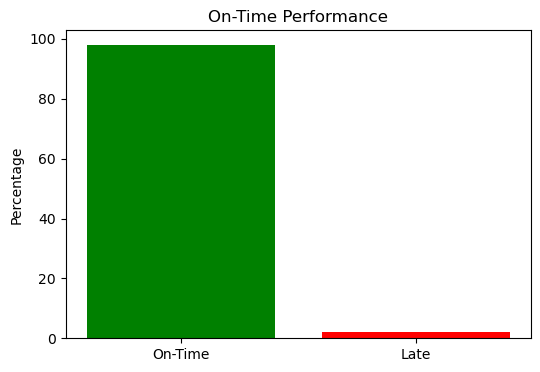

In [30]:
# calculate OTP percentage
otp_percentage = otp_data['on_time'].mean() * 100

# plot
plt.figure(figsize=(6,4))
plt.bar(['On-Time', 'Late'], [otp_percentage, 100 - otp_percentage], color=['green', 'red'])
plt.title("On-Time Performance")
plt.ylabel("Percentage")
plt.show()

In [32]:
# Group by route and stop to calculate average delays
patterns = otp_data.groupby(['route_id', 'stop_id']).agg(
    avg_delay=('delay_seconds', 'mean'),
    on_time_percentage=('on_time', 'mean')
).reset_index()

# Identify poorly performing routes or stops
poor_performance = patterns[patterns['on_time_percentage'] < 0.8]
print(poor_performance)


     route_id stop_id   avg_delay  on_time_percentage
429        12   14411  142.208333            0.500000
549        12    8212  130.416667            0.500000
1463      190    7606  148.000000            0.500000
1464      190    7608  230.000000            0.500000
1465      190    7618  125.000000            0.500000
...       ...     ...         ...                 ...
2718      293    7787         NaN            0.000000
2719      293    9299         NaN            0.000000
2720      293    9303         NaN            0.000000
3420       35   13816   92.777778            0.666667
7943        9    8199  108.841584            0.737226

[207 rows x 4 columns]
